In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt

from DNN import DNN
from utils import show_img
import scipy.io as sio

Using TensorFlow backend.


# Load & pre-process data

## Loads binaryAlphadigits

In [2]:
num_class = 36
input_shape = (20, 16)

classlabels = sio.loadmat('data/binaryalphadigs.mat')['classlabels'][0]
dat = sio.loadmat('data/binaryalphadigs.mat')['dat']
num_example = 39

X = np.zeros((num_class, num_example, *input_shape))
Y = np.zeros((num_class, num_example))

for idx_class in range(num_class):
    X[idx_class] = np.array([*dat[idx_class,:]])
    Y[idx_class] = idx_class
    
X = X.reshape((-1, np.prod(input_shape)))

Y = Y.reshape((-1))
Y = keras.utils.to_categorical(Y)

# Shuffle
p = np.random.permutation(X.shape[0])
X = X[p,]
Y = Y[p,]

print(f"X: {X.shape}\nY: {Y.shape}\ninput_shape: {input_shape}")

X: (1404, 320)
Y: (1404, 36)
input_shape: (20, 16)


# Training

In [3]:
dnn = DNN(n_h=[np.prod(input_shape), 32, num_class])

100%|██████████| 100/100 [00:03<00:00, 31.29it/s]


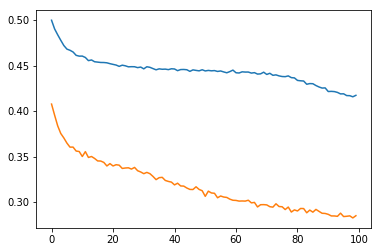

In [4]:
dnn.train(X, epochs=100, lr=1e-4)

Loss: 4.563	Acc: 3.49
Loss: 4.465	Acc: 12.251
Loss: 4.376	Acc: 14.601
Loss: 4.322	Acc: 16.168
Loss: 4.29	Acc: 16.524


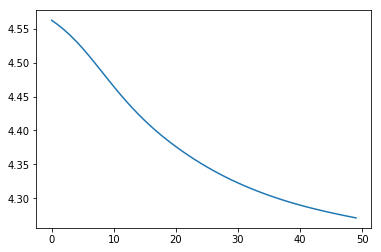

In [5]:
dnn.train_supervised(X, Y, epochs=50, batch_size=8, lr=1)

# Create image

In [6]:
noise = np.random.normal(size=(1, np.prod(input_shape)))
output = noise
n_iter = 40

for _ in range(n_iter):
    output = dnn.backward(dnn.forward(output))

In [7]:
img = np.squeeze(output.reshape(input_shape))

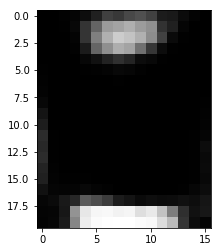

In [8]:
show_img(img)

# Visualization (classification)

In [9]:
def idx2char(idx):
    if idx < 10:
        return str(idx)
    else:
        return chr(97 + idx - 10)

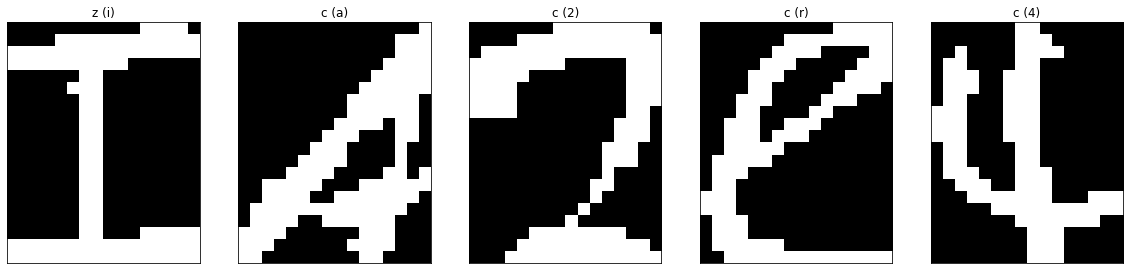

In [10]:
n_images = 5

# Sample images
sample_idx = np.random.choice(X.shape[0], n_images)
x_sample = X[sample_idx]
y_sample = Y[sample_idx]

# Run prediction
y_hat = dnn.forward_full(x_sample)

# Visualize
plt.figure(figsize=(20, 10))
for i in range(n_images):
    ax = plt.subplot(1, n_images, i+1)
    
    plt.imshow(x_sample[i].reshape(input_shape), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f"{idx2char(np.argmax(y_hat[i]))} ({idx2char(np.argmax(y_sample[i]))})")